In [9]:
import numpy as np
import pandas as pd
import  psycopg2
import matplotlib.pyplot as plt

In [2]:
 conn = psycopg2.connect(
     host='localhost', 
     dbname='cpdp', 
     user='blaine', 
     password='postgres'
 )

In [27]:

def tag_and_plot(query, title):
    tagging_df = pd.read_sql_query(
        query,
        conn
    )

    objects = tuple(tagging_df['topic1_id'])
    y_pos = np.arange(len(objects))
    counts = list(tagging_df['count'])

    plt.bar(y_pos, counts, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.xlabel('document topic id')
    plt.ylabel('1st assignment count')
    plt.title(title + ' Document Topic Assignment')
    plt.savefig('images/' + title + '.png')

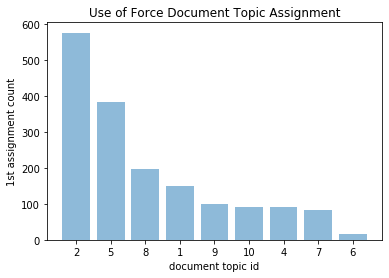

In [28]:
uof_query = """
     SELECT category.category, ddtm.topic1_id, count(*)
     FROM data_officerallegation officerallegation
     JOIN data_allegation allegation on officerallegation.allegation_id = allegation.id
     JOIN data_allegationcategory category on officerallegation.allegation_category_id = category.id
     JOIN allegation_keys keys ON keys.id = allegation.id
     INNER JOIN data_document_tags AS doc_tag on keys.crid = doc_tag.allegation_id
     JOIN data_document_topic_map ddtm on doc_tag.id = ddtm.document_id
     WHERE lower(category.category) = 'use of force'
     GROUP BY category.category, ddtm.topic1_id
     HAVING count(*) > 10
     ORDER BY count(*) desc
"""

tag_and_plot(uof_query, 'Use of Force')

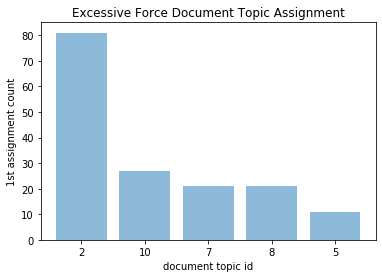

In [32]:
ef_query = """
     SELECT category.category, ddtm.topic1_id, count(*)
     FROM data_officerallegation officerallegation
     JOIN data_allegation allegation on officerallegation.allegation_id = allegation.id
     JOIN data_allegationcategory category on officerallegation.allegation_category_id = category.id
     JOIN allegation_keys keys ON keys.id = allegation.id
     INNER JOIN data_document_tags AS doc_tag on keys.crid = doc_tag.allegation_id
     JOIN data_document_topic_map ddtm on doc_tag.id = ddtm.document_id
     WHERE lower(category.category) = 'excessive force'
     GROUP BY category.category, ddtm.topic1_id
     HAVING count(*) > 10
     ORDER BY count(*) desc
"""

tag_and_plot(ef_query, 'Excessive Force')

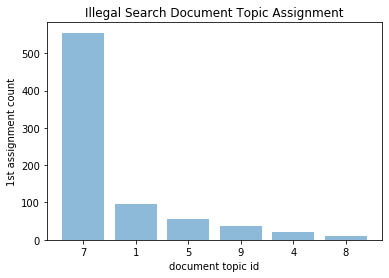

In [29]:
ls_query = """
     SELECT category.category, ddtm.topic1_id, count(*)
     FROM data_officerallegation officerallegation
     JOIN data_allegation allegation on officerallegation.allegation_id = allegation.id
     JOIN data_allegationcategory category on officerallegation.allegation_category_id = category.id
     JOIN allegation_keys keys ON keys.id = allegation.id
     INNER JOIN data_document_tags AS doc_tag on keys.crid = doc_tag.allegation_id
     JOIN data_document_topic_map ddtm on doc_tag.id = ddtm.document_id
     WHERE lower(category.category) = 'illegal search'
     GROUP BY category.category, ddtm.topic1_id
     HAVING count(*) > 10
     ORDER BY count(*) desc
"""

tag_and_plot(ls_query, 'Illegal Search')

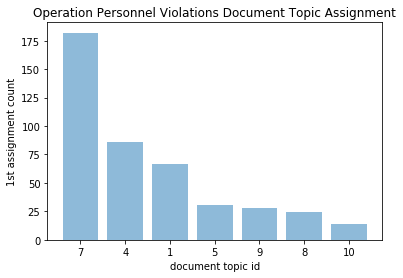

In [36]:
opv_query = """
     SELECT category.category, ddtm.topic1_id, count(*)
     FROM data_officerallegation officerallegation
     JOIN data_allegation allegation on officerallegation.allegation_id = allegation.id
     JOIN data_allegationcategory category on officerallegation.allegation_category_id = category.id
     JOIN allegation_keys keys ON keys.id = allegation.id
     INNER JOIN data_document_tags AS doc_tag on keys.crid = doc_tag.allegation_id
     JOIN data_document_topic_map ddtm on doc_tag.id = ddtm.document_id
     WHERE lower(category.category) = 'operation/personnel violations'
     GROUP BY category.category, ddtm.topic1_id
     HAVING count(*) > 10
     ORDER BY count(*) desc
"""

tag_and_plot(opv_query, 'Operation Personnel Violations')

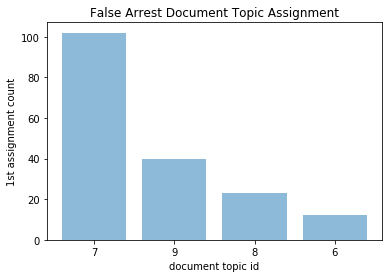

In [37]:
fa_query = """
     SELECT category.category, ddtm.topic1_id, count(*)
     FROM data_officerallegation officerallegation
     JOIN data_allegation allegation on officerallegation.allegation_id = allegation.id
     JOIN data_allegationcategory category on officerallegation.allegation_category_id = category.id
     JOIN allegation_keys keys ON keys.id = allegation.id
     INNER JOIN data_document_tags AS doc_tag on keys.crid = doc_tag.allegation_id
     JOIN data_document_topic_map ddtm on doc_tag.id = ddtm.document_id
     WHERE lower(category.category) = 'false arrest'
     GROUP BY category.category, ddtm.topic1_id
     HAVING count(*) > 10
     ORDER BY count(*) desc
"""

tag_and_plot(fa_query, 'False Arrest')

In [40]:
uof_yoy_query = """
      SELECT category.category, ddtm.topic1_id,  date_part('year', allegation.incident_date) as year, count(*)
     FROM data_officerallegation officerallegation
     JOIN data_allegation allegation on officerallegation.allegation_id = allegation.id
     JOIN data_allegationcategory category on officerallegation.allegation_category_id = category.id
     JOIN allegation_keys keys ON keys.id = allegation.id
     INNER JOIN data_document_tags AS doc_tag on keys.crid = doc_tag.allegation_id
     JOIN data_document_topic_map ddtm on doc_tag.id = ddtm.document_id
     WHERE lower(category.category) = 'use of force'
    --  AND allegation.incident_date::DATE > '2003-01-01' AND allegation.incident_date::DATE < '2003-12-31'
     GROUP BY category.category, ddtm.topic1_id, year
     HAVING count(*) > 10
     ORDER BY count(*) desc
"""

uof_yoy_df = pd.read_sql_query(
    uof_yoy_query,
    conn
)

uof_yoy_df.head(25)

,category,topic1_id,year,count
0,Use Of Force,2,2012.0,387
1,Use Of Force,2,2014.0,64
2,Use Of Force,8,2012.0,50
3,Use Of Force,5,2011.0,49
4,Use Of Force,10,2012.0,49
5,Use Of Force,2,2013.0,46
6,Use Of Force,8,2013.0,43
7,Use Of Force,5,2017.0,37
8,Use Of Force,1,2000.0,36
9,Use Of Force,5,2013.0,35


In [75]:
years = [2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
topics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
topic_years = [[],[],[],[],[],[],[],[],[],[]]
for t_idx, t in enumerate(topics):
    topic_df = uof_yoy_df[uof_yoy_df.topic1_id == t]
    for y_idx, y in enumerate(years):
        year_count = 0
        year_df = topic_df[topic_df.year == y]
#         print(year_df.count()['count'])
        if year_df.count()['count'] > 0:
            year_count = year_df.iloc[0]['count']
        
        topic_years[t_idx].append(year_count)

In [76]:
topic_years

[[36, 27, 20, 0, 11, 12, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 26, 387, 46, 64, 26, 24, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 16, 0, 0, 0, 0, 0, 0, 0, 0, 0, 17, 0, 0, 0],
 [11, 11, 0, 28, 20, 0, 13, 14, 13, 19, 49, 33, 35, 26, 23, 0, 37],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 15, 0, 0, 0, 15, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 50, 43, 32, 27, 15, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 16, 20, 12, 27, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 49, 0, 19, 0, 0, 0]]

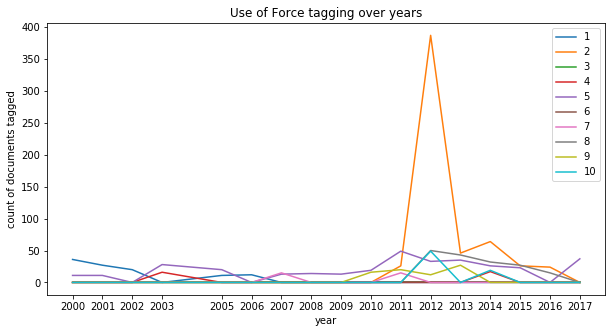

In [93]:
plt.figure(figsize=(10,5))
for ty_idx, ty in enumerate(topic_years):
    label = str(ty_idx+1)
    plt.plot(years, ty, label=label)
    
plt.xticks(years)
plt.legend()
plt.title('Use of Force tagging over years')
plt.ylabel('count of documents tagged')
plt.xlabel('year')
plt.savefig('images/uof_years_tagging.png')

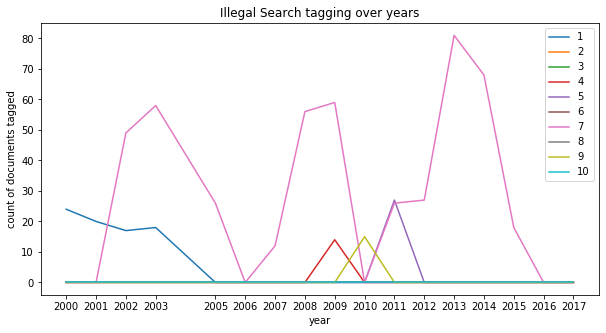

In [94]:
uof_yoy_query = """
      SELECT category.category, ddtm.topic1_id,  date_part('year', allegation.incident_date) as year, count(*)
     FROM data_officerallegation officerallegation
     JOIN data_allegation allegation on officerallegation.allegation_id = allegation.id
     JOIN data_allegationcategory category on officerallegation.allegation_category_id = category.id
     JOIN allegation_keys keys ON keys.id = allegation.id
     INNER JOIN data_document_tags AS doc_tag on keys.crid = doc_tag.allegation_id
     JOIN data_document_topic_map ddtm on doc_tag.id = ddtm.document_id
     WHERE lower(category.category) = 'illegal search'
    --  AND allegation.incident_date::DATE > '2003-01-01' AND allegation.incident_date::DATE < '2003-12-31'
     GROUP BY category.category, ddtm.topic1_id, year
     HAVING count(*) > 10
     ORDER BY count(*) desc
"""

uof_yoy_df = pd.read_sql_query(
    uof_yoy_query,
    conn
)

years = [2000, 2001, 2002, 2003, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
topics = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
topic_years = [[],[],[],[],[],[],[],[],[],[]]
for t_idx, t in enumerate(topics):
    topic_df = uof_yoy_df[uof_yoy_df.topic1_id == t]
    for y_idx, y in enumerate(years):
        year_count = 0
        year_df = topic_df[topic_df.year == y]
#         print(year_df.count()['count'])
        if year_df.count()['count'] > 0:
            year_count = year_df.iloc[0]['count']
        
        topic_years[t_idx].append(year_count)
        
plt.figure(figsize=(10,5))
for ty_idx, ty in enumerate(topic_years):
    label = str(ty_idx+1)
    plt.plot(years, ty, label=label)
    
plt.xticks(years)
plt.legend()
plt.title('Illegal Search tagging over years')
plt.ylabel('count of documents tagged')
plt.xlabel('year')
plt.savefig('images/ls_years_tagging.png')